# 0. 初期設定

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab


## 1. テスト用のサンプルを発生

In [2]:
num_samples = 100

mu1 = 0
sigma1 =  3

mu2 = 10
sigma2 = 3

x1 = sigma1 * np.random.randn(num_samples) + mu1
x2 = sigma2 * np.random.randn(num_samples) + mu2

####################################
# 分離可能なデータを作成する場合は以下コメントをとる
####################################
#thr = 5
#x1[x1>thr-0.5] = x1[x1>thr-0.5]-thr
#x2[x2<thr+0.5] = x2[x2 < thr+0.5]+thr

### 1.1 散布図を表示

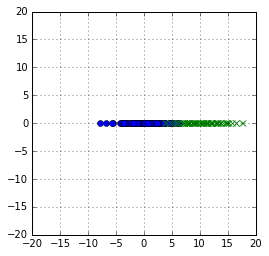

In [3]:
plt.figure()
ax = pylab.gca()

xmax = 20
ymax = 20

# グラフ表示
plt.xlim([-xmax,xmax])
plt.ylim([-ymax,ymax])
plt.grid()

aspect = (ax.get_xlim()[1] - ax.get_xlim()[0]) / (ax.get_ylim()[1] - ax.get_ylim()[0])                     
ax.set_aspect(aspect)

plt.plot(x1, np.zeros(num_samples),  'o')
plt.plot(x2, np.zeros(num_samples),  'x')

plt.draw()
plt.show()
#plt.savefig("scatter_non_separatable.png")

### 1.2 ヒストグラムを表示

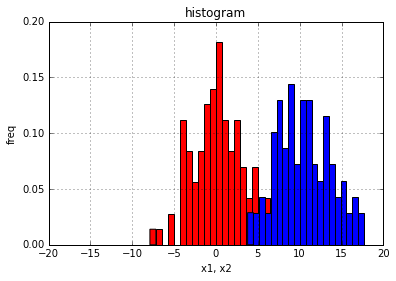

In [4]:
plt.figure()
ax = pylab.gca()

num_bins = 20

xmax = 20
ymax = 0.2

# グラフ表示
plt.xlim([-xmax,xmax])
plt.ylim([0, ymax])
plt.grid()

#aspect = (ax.get_xlim()[1] - ax.get_xlim()[0]) / (ax.get_ylim()[1] - ax.get_ylim()[0])                     
#ax.set_aspect(aspect)

ax.set_title('histogram')
ax.set_xlabel('x1, x2')
ax.set_ylabel('freq')

ax.hist(x1, bins=num_bins, normed=True, color='red')
ax.hist(x2, bins=num_bins, normed=True, color='blue')

plt.draw()
plt.show()
#plt.savefig("histgram_non_separatable.png")

## 2. 誤差関数（$\approx$ 尤度関数)を計算する関数を作成

### 2.1 log(1+exp(x))を計算する関数を定義

In [5]:
def calcLogExp(x):
    res = np.copy(x)
    mask = res <= 0
    #print(res[mask])     #for debug
    res[mask] = np.log(1.0 + np.exp(res[mask]))
    res[~mask] = res[~mask] + np.log(1.0 + np.exp(-res[~mask]))
    return res

### 2.2 calcLogExp関数のテスト

In [6]:
x = np.array([-1000, -100, -10, -1, 0, 1,10,100,1000], dtype='float64')
print(calcLogExp(x))

[  0.00000000e+00   0.00000000e+00   4.53988992e-05   3.13261688e-01
   6.93147181e-01   1.31326169e+00   1.00000454e+01   1.00000000e+02
   1.00000000e+03]


（ベンチマーク）
array([  0.00000000e+00,   0.00000000e+00,   4.53988992e-05,
         3.13261688e-01,   6.93147181e-01,   1.31326169e+00,
         1.00000454e+01,   1.00000000e+02])

### 2.3 誤差関数（PRMLの(4.90)）を計算。(ついでに$t_n \log y_n$と$(1-t_n)\log(1-y_n)$も出力する)

In [7]:
def calcErr(w0, w1, x1, x2):

    #wxを計算
    wx1 = w1 * x1 + w0
    wx2 = w1 * x2 + w0

    #誤差関数（=Sigmoid関数)を計算
    s1 = 1 /  (1 + np.exp(-wx1))
    s2 = 1- 1 / (1 + np.exp(-wx2))

    #対数誤差関数の各要素を計算
    e1 = calcLogExp(-wx1)
    e2 = wx2 + calcLogExp(-wx2)

    #対数誤差を計算
    err = e1.sum() + e2.sum()

    return s1, s2, e1, e2, err

## 3. wを動かし、分離平面（wx）、事後確率（sigmoid関数）、対数事後関数（誤差関数の要素）がどのように変化するかを見る

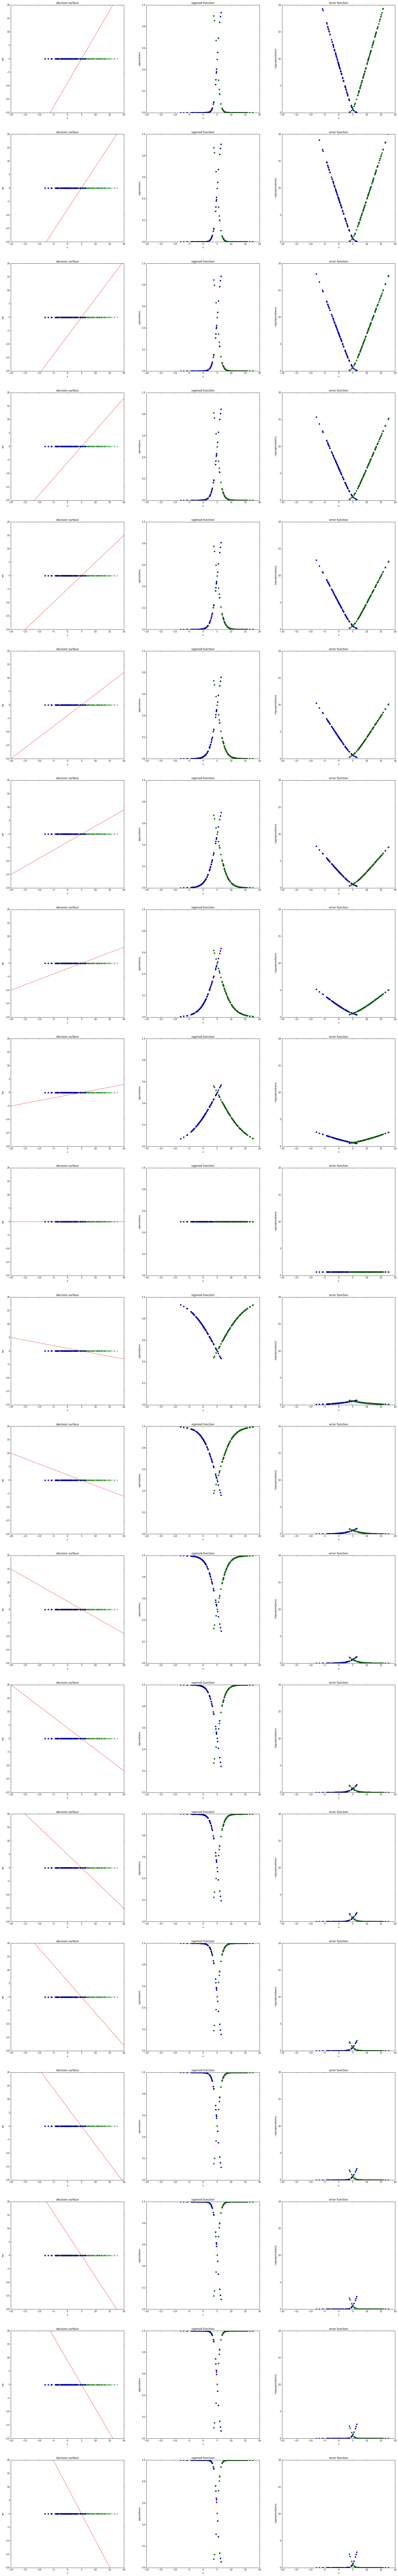

In [8]:
fig = plt.figure()

size_j = 3
size_i = 20

fig = plt.figure(figsize=(size_j * 10, size_i * 10)) # for matplotlib inline context
#fig = plt.figure(figsize=(12, size_i * 3))  # for osx context

ax = []

# wの初期値を設定
w0 = -10
w1 = -w0 / 5

for i in range(size_i):

    #wを動かす
    w0 = w0 + 1
    w1 = -w0 / 5

    # sub plotを準備
    for j in range(size_j):
        ax.append(fig.add_subplot(size_i, size_j, i * size_j + j + 1))

    ###########################
    # 散布図と分離平面を表示
    ###########################
    xmin = -20
    xmax = 20
    ymin = -20
    ymax = 20
    ax[i * size_j].set_xlim([xmin, xmax])
    ax[i * size_j].set_ylim([ymin, ymax])   

    ax[i * size_j].set_title('decision surface')
    ax[i * size_j].set_xlabel('x')
    ax[i * size_j].set_ylabel('wx')

    ## 散布図を表示
    ax[i * size_j].plot(x1, np.zeros_like(x1), 'o')
    ax[i * size_j].plot(x2, np.zeros_like(x2), 'x')

    ## 分離平面を表示
    x = np.arange(ymin, ymax, 0.01)
    wx = w1 * x + w0
    ax[i * size_j].plot(x, wx, '-')

    ###########################
    # sigmoid関数を表示
    ###########################
    xmin = -20
    xmax = 20
    ymin = 0
    ymax = 1
    ax[i * size_j + 1].set_xlim([xmin, xmax])
    ax[i * size_j + 1].set_ylim([ymin, ymax])   

    ax[i * size_j + 1].set_title('sigmoid function')
    ax[i * size_j + 1].set_xlabel('x')
    ax[i * size_j + 1].set_ylabel('sigmoid(wx)')

    ## sigmoid関数を表示
    s1, s2, e1, e2, err = calcErr(w0, w1, x1, x2)
    ax[i * size_j + 1].plot(x1, s1, 'o')
    ax[i * size_j + 1].plot(x2, s2, 'o')

    ###########################
    # 対数誤差関数の要素を表示
    ###########################
    xmin = -20
    xmax = 20
    ymin = 0
    ymax = 20

    ax[i * size_j + 2].set_xlim([xmin, xmax])
    ax[i * size_j + 2].set_ylim([ymin, ymax])   

    ax[i * size_j + 2].set_title('error function')
    ax[i * size_j + 2].set_xlabel('x')
    ax[i * size_j + 2].set_ylabel('- log(sigmoid(wx))')
    
    ## error関数を表示
    ax[i * size_j + 2].plot(x1, e1, 'o')
    ax[i * size_j + 2].plot(x2, e2, 'o')

plt.show()
#plt.savefig("move_w_non_separatable.png")

## 4. w0, w1を動かして、誤差関数のグラフを表示

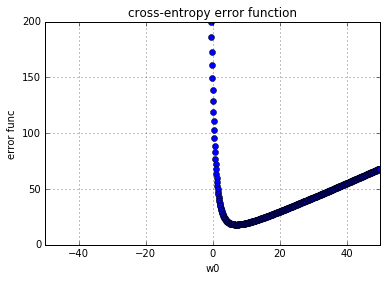

In [9]:
w0min = -50
w0max = 50
w0step = 0.1

w0s = np.arange(w0min, w0max, w0step)
errs = np.zeros_like(w0s)

i = 0
for w0 in w0s:
    w1 = -w0 / 5
    s1, s2, e1, e2, err = calcErr(w0, w1, x1, x2)
    errs[i] = err
    i  = i + 1

#print (w0s)
#print(errs)

plt.figure()
ax = pylab.gca()

ymax = 200

# グラフ表示
plt.xlim([w0min, w0max])
plt.ylim([0, ymax])
plt.grid()

ax.set_title('cross-entropy error function')
ax.set_xlabel('w0')
ax.set_ylabel('error func')

ax.plot(w0s, errs, 'o')

plt.draw()
plt.show()
#plt.savefig("cross_entropy_error_non_separatable.png")

# -------以下は作業時に一時的に作成したもの-------

## sigmoid関数を表示

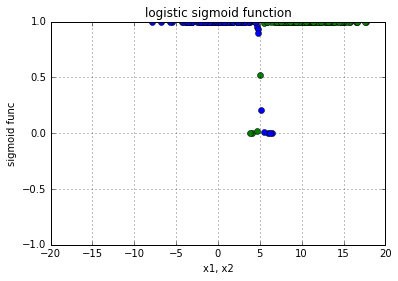

In [10]:
w0 = 50
w1 = -10

wx1 = w1 * x1 + w0
swx1 = 1 /  (1 + np.exp(-wx1))

wx2 = w1 * x2 + w0
swx2 = 1- 1 / (1 + np.exp(-wx2))

# print for debug
#print(x1)
#print(wx1)
#print(swx1)

plt.figure()
ax = pylab.gca()

xmax = 20
ymax = 1

# グラフ表示
plt.xlim([-xmax,xmax])
plt.ylim([-ymax, ymax])
plt.grid()

#aspect = (ax.get_xlim()[1] - ax.get_xlim()[0]) / (ax.get_ylim()[1] - ax.get_ylim()[0])                     
#ax.set_aspect(aspect)

ax.set_title('logistic sigmoid function')
ax.set_xlabel('x1, x2')
ax.set_ylabel('sigmoid func')

ax.plot(x1, swx1, 'o')
ax.plot(x2, swx2, 'o')

plt.draw()
plt.show()

### 対数尤度関数のグラフを表示

19.426700441


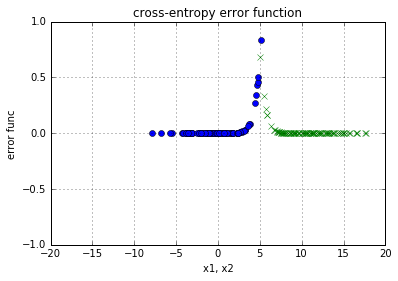

In [11]:
w0 = 10
w1 = -w0 / 5

s1, s2, e1, e2, err = calcErr(w0, w1, x1, x2)
print(err)

plt.figure()
ax = pylab.gca()

xmax = 20
ymax = 1

# グラフ表示
plt.xlim([-xmax,xmax])
plt.ylim([-ymax, ymax])
plt.grid()

ax.set_title('cross-entropy error function')
ax.set_xlabel('x1, x2')
ax.set_ylabel('error func')

ax.plot(x1, e1, 'o')
ax.plot(x2, e2, 'x')

plt.draw()
plt.show()